# 4. Geth, 계정

Last Updated 20190403WED0000 20180717TUE1700 201801231MON1800 20160207
* digital sig: verification, python library (bitcoin, eth_ ...)

## 학습내용

### 목표

- geth eth, admin, miner, personal 명령어 학습
- geth 계정, 디지털서명 학습


### 목차

4 Geth, 계정
* 4.1 Geth basic commands
* 4.1.1 eth 명령어
* 4.1.2 admin 명령어
* 4.1.3 miner 명령어
* 4.1.4 personal 명령어
* 4.2 [계정](#4.2)
* 4.2.1 계정의 종류
    * 개인 계정
    * 계약 계정
* 4.2.2 address 생성
    * 주소 생성 절차
    * private key 생성
    * private key에서 public key 생성
    * public key에서 주소 생성
    * 주소 파일
    * WIF
* 4.2.3 계정의 속성
    * balance
    * nonce
    * storageRoot
    * codeHash
* 문제 4-1: [계정을 생성하기](#4-1)
* 문제 4-2: [계정을 coinbase로 정하기](#4-2)

* 4.2.4 해싱
    * 4.2.5 디지털서명
    * ECDSA
    * Elliptic curve 연산
    * 더하기 연산으로 구하는 PubKey
    * 유한체 Elliptic curve
    * secp256k1
* 문제 4-3: [계정 충전하기](#4-3)

* 4.2.6 Wallet


### 문제



## 4.1 Geth

Geth는 **G**o로 구현된 **eth**ereum이라는 앞 글자를 따와서 이름이 붙여졌다.
Geth를 실행하면, 네트워크에 연결이 되고 자신을 이더리움 노드로 만든다.
Geth는 콘솔을 열어서 자바스크립트 프로그램을 할 수 있는데,
블록체인에 프로그램을 배포하거나, 마이닝하거나, 상태를 파악하는 등 여러 기능을 활용할 수 있다.


### 4.1.1 eth 명령어

eth 모듈은 계정, 블록, gas, 트랜잭션, 디지털사인 관련 명령을 제공한다.

```python
eth._requestManager            eth.getAccounts                eth.getProtocolVersion         eth.isSyncing
eth.accounts                   eth.getBalance                 eth.getRawTransaction          eth.mining
eth.blockNumber                eth.getBlock                   eth.getRawTransactionFromBlock eth.namereg
eth.call                       eth.getBlockNumber             eth.getStorageAt               eth.pendingTransactions
eth.chainId                    eth.getBlockTransactionCount   eth.getSyncing                 eth.protocolVersion
eth.coinbase                   eth.getBlockUncleCount         eth.getTransaction             eth.resend
eth.compile                    eth.getCode                    eth.getTransactionCount        eth.sendIBANTransaction
eth.constructor                eth.getCoinbase                eth.getTransactionFromBlock    eth.sendRawTransaction
eth.contract                   eth.getCompilers               eth.getTransactionReceipt      eth.sendTransaction
eth.defaultAccount             eth.getGasPrice                eth.getUncle                   eth.sign
eth.defaultBlock               eth.getHashrate                eth.getWork                    eth.signTransaction
eth.estimateGas                eth.getMining                  eth.hashrate                   eth.submitTransaction
eth.filter                     eth.getPendingTransactions     eth.iban                       eth.submitWork
eth.gasPrice                   eth.getProof                   eth.icapNamereg                eth.syncing
```

coinbase 또는 etherbase는 자신의 주 계정을 말한다.
주 계정의 잔고 balance를 wei로 출력해 보자.
현재 블록의 개수를 구한다.

In [1]:
%%writefile src/ethCommands.js
var primary = eth.accounts[0];
var bal=eth.getBalance(primary);
console.log('balance in Wei: ', bal);
console.log('balance in ether: ', web3.fromWei(bal, "ether"));
console.log('blocknumber: ', eth.blockNumber);
console.log('coinbase: ', eth.coinbase);

Overwriting src/ethCommands.js


In [1]:
!geth --exec 'loadScript("src/ethCommands.js")' attach http://117.16.44.45:8445

balance in Wei:  18999999999999986000
balance in ether:  18.999999999999986
blocknumber:  687
coinbase:  0xd9ee4d08a86b430544254ff95e32aa6fcc1d3163
true


### 4.1.2 admin commands

admin모듈은 Peer, RPC 등 노드의 관리에 필요한 명령어를 제공한다.


```python
admin.addPeer              admin.getDatadir           admin.nodeInfo             admin.sleepBlocks          admin.toString
admin.addTrustedPeer       admin.getNodeInfo          admin.peers                admin.startRPC             admin.valueOf
admin.clearHistory         admin.getPeers             admin.propertyIsEnumerable admin.startWS
admin.constructor          admin.hasOwnProperty       admin.removePeer           admin.stopRPC
admin.datadir              admin.importChain          admin.removeTrustedPeer    admin.stopWS
admin.exportChain          admin.isPrototypeOf        admin.sleep                admin.toLocaleString
```

admin.nodeInfo 명령어는 node 자신과 관련한 정보를 알려 준다.
* **enode**는 이더리움 노드 URL이다. 우리가 사용하는 URL과 같이 고유의 ID로서 특정하여 지칭하거나 찾을 수 있다.
bootnode로 사용하는 경우
고유 URL은 ```enode://<<사용자 이름>>@<<호스트>>:<<포트>>```
**사용자 이름**은 16진수로 나타내며, **호스트**는 도메인명은 허용이 안되며 IP주소로 나타낸다.
* 그리고 genesis block에 설정한 내용을 확인할 수 있다.

In [27]:
!geth --exec admin.nodeInfo attach http://117.16.44.45:8445

{
  enode: "enode://41c245cea7c9287f9f2850981b5c95f0367ddd1bcb737e6eee623c619b94ac8770cc4ec38119ae2ce72dd5104c601d947a82e9273415005c0d875469a12c6533@117.16.44.45:38445",
  enr: "0xf89cb840312a6d23c9d2a96ccb8aee5ed455110d8b6d690e855dc5b000aa16ec3dc954e72e2f3d26de2e1752c4bf753ba4e508bfbe4490b84999e7d8c48c7b5f4ed4d59b5083636170ccc5836574683ec5836574683f8269648276348269708475102c2d89736563703235366b31a10341c245cea7c9287f9f2850981b5c95f0367ddd1bcb737e6eee623c619b94ac878374637082962d8375647082962d",
  id: "aeff598d538a0ca7c2cfd7dd370c185933785dcb3cb5112bcf1db0f28fea970b",
  ip: "117.16.44.45",
  listenAddr: "[::]:38445",
  name: "Geth/jslNode/v1.8.22-stable-7fa3509e/linux-amd64/go1.10.4",
  ports: {
    discovery: 38445,
    listener: 38445
  },
  protocols: {
    eth: {
      config: {
        chainId: 33,
        eip150Hash: "0x0000000000000000000000000000000000000000000000000000000000000000",
        eip155Block: 0,
        eip158Block: 0,
        homesteadBlock: 0
      },
      difficul

In [25]:
!geth --exec admin.peers attach http://117.16.44.45:8445

[]


In [32]:
%%writefile src/ethNet.js
console.log('peer count: ', net.peerCount);
console.log('net.listening: ', net.listening);

Writing src/ethNet.js


In [33]:
!geth --exec 'loadScript("src/ethNet.js")' attach http://117.16.44.45:8445

peer count:  0
net.listening:  true
true


### 4.1.3 miner commands

miner모듈은 마이닝을 시작하거나 종료할 수 있는 명령어와 마이닝 관련 etherBase, gasPrice를 설정할 수 있다.

```python
miner.constructor          miner.isPrototypeOf        miner.setExtra             miner.start                miner.toString
miner.getHashrate          miner.propertyIsEnumerable miner.setGasPrice          miner.stop                 miner.valueOf
miner.hasOwnProperty       miner.setEtherbase         miner.setRecommitInterval  miner.toLocaleString
```

마이닝은 Target Hash를 맞출 때까지 계속 Hash를 생성하여 시도하는 과정이다.
**hash rate**은 **1초에 시도한 횟수**를 의미한다.


In [26]:
%%writefile src/ethMiner.js
console.log('Hash rate: ', miner.getHashrate());

Overwriting src/ethMiner.js


In [27]:
!geth --exec 'loadScript("src/ethMiner.js")' attach http://117.16.44.45:8445

Hash rate:  278606
true


In [28]:
!geth --exec 'miner.getHashrate()' attach http://117.16.44.45:8445

277252


**eterBase**는 마이닝이 성공하면 보상이 주어진다. 그 입금 계좌를 말한다.

In [35]:
%%writefile src/ethMinerEtherbase.js
console.log('Before: ', eth.coinbase);
miner.setEtherbase(eth.accounts[1]);
console.log('After: ', eth.coinbase);

Overwriting src/ethMinerEtherbase.js


In [37]:
!geth --exec 'loadScript("src/ethMinerEtherbase.js")' attach http://117.16.44.45:8445

Before:  0x21c704354d07f804bab01894e8b4eb4e0eba7451
After:  0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480
true


### 4.1.4 personal

계정 및 지급과 관련한 명령어를 포함하고 있으므로, RPC로 사용할 경우 주의가 필요하다.

```python
personal._requestManager personal.getListAccounts personal.listWallets     personal.sendTransaction
personal.constructor     personal.getListWallets  personal.lockAccount     personal.sign
personal.deriveAccount   personal.importRawKey    personal.newAccount      personal.signTransaction
personal.ecRecover       personal.listAccounts    personal.openWallet      personal.unlockAccount
```

자신이 개설한 계정을 확인할 수 있다.

In [50]:
!geth --exec 'personal.listAccounts' attach http://117.16.44.45:8445

["0x21c704354d07f804bab01894e8b4eb4e0eba7451", "0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480"]


txpool은 트랜잭션이 마이닝되기 전에 대기하는 transaction pool의 상황을 알려 준다.

In [54]:
!geth --exec 'txpool.inspect' attach http://117.16.44.45:8445

{
  pending: {},
  queued: {}
}


In [55]:
!geth --exec 'txpool.status' attach http://117.16.44.45:8445

{
  pending: 0,
  queued: 0
}


## 4.2 계정
<a id='4.2'></a>

계정은 은행의 계좌번호와 매우 유사하다.
이더리움의 계정은 은행계정과 같이 잔고를 가지고 있어 수금, 송금이 가능하다.
계정은 누구나 만들 수 있다.
그러나 은행계정과 달리 암호화되어 있기 때문에 단순한 문자열이 아니다. 육안으로 봐도 난해하게 생긴 문자일 뿐이다.
계정은 거래가 최초 발생해야 블록체인에 기록이되고 알려진다.
따라서 계정은 온라인에 연결되어 있지 않아도 만들 수 있다.
누구나 그 계정에 입금을 할 수 있다.
존재하지 않거나, 인증할 수 없는 계정으로의 입금은 거래가 취소된다.
출금은 당연히 **디지털서명**이 되어야 한다.

은행에서 입출금 거래를 하면서 서명 또는 날인을 하듯이 블록체인 거래도 그러하다.
**디지털서명**이 되어 있어야 거래로 인정된다.
거래가 위변조되면 디지털서명이 맞지 않게 된다. 이 경우 새로이 서명이 필요하다.
누군가 악의적으로 원래의 디지털 서명을 사용하지 않으면, 대칭키인 공개키, public key로 풀 수 없게 된다.

### 4.2.1 계정의 종류

이더리움 계정은 **개인 또는 계약**이 가질 수 있다.
우리가 계약을 한다고 하자. 당사자 간에 송금이 이루어진다.
계약 자체가 계정을 가지고 입출금을 할 수 있고, 잔고를 가질 수 있다는 의미이다.

구분 | 설명
-----|-----
외부 계정 | 블록체인 외부의 계정, 보통 송수신하는 측의 계정을 말한다.
내부 계정 | 블록체인 내부의 계정, 보통 컨트랙의 계정을 말한다.

#### 개인 계정
블록체인 **외부 액터가 가지는 계정 Externally Owned Account**이다.
외부 액터는 보통 개인이지만 기업이 될 수도 있을 뿐만 아니라 컴퓨터, 인터넷 또는 하드웨어가 될 수도 있다.
개인 계정은 고유의 **키**를 가지고 있어 트랜잭션을 **사인 sign**할 수 있다.


#### 계약 계정
**블록체인 내부의 자율객체 Autonomous Object가 가지는 계정**을 말한다. 자율객체란 고유의 주소와 상태정보를 가지고 블록체인 안에 가상으로 존재한다. 보통은 **프로그램 코드를 가지고 실행되는 스마트계약**을 자율객체라고 말한다.
스마트 계약의 **프로그램 코드가 배포되면서 주소가 생성**되며, 그 순간부터 상태정보를 가지게 된다.
계약 계정이 특별난 것은 **잔고**를 가지기 때문이다. 프로그램 코드에 의해 실행되는 계약 계정이 주소를 가질 수 있고 잔고를 가질 수 있기 때문에 코인을 발행할 수 있다. 그러나 **개인계정과 달리 키가 없어** 트랜잭션에 사인할 수는 없다.


### 4.2.2 address 생성

이더리움은 한 계정에 하나의 주소를 가진다. 다음에서 보듯이 ```geth account new``` 명령어로 계정을 생성하면 주소 역시 생성된다.

> 주소와 계정

> **주소 address**는 **20 바이트 코드**로 계정 account의 고유번호이다. 다른 말로 계정은 하나의 주소 식별자를 가진다.
> 계정은 잔고와 거래건수를 가진다. 계정은 외부계정 또는 컨트랙이 가질 수 있다.

#### 주소 생성 절차

주소는 개인키에서 생성된 공개키로부터 생성된다. 그 순서는:

private --(ECDSA)--> public --(Keccak-256 hashing)--> address

#### private key 생성
무작위로 생성한다.
비유를 하면 동전을 256번 던져서 256비트의 수를 생성하는 것과 같다.
이 수를 우연히 맞추는 확률은 사실상 불가능하다.
hexadecimal 16진수 64자리, 즉 32바이트 길이로 생성된다.

```python
3a1076bf45ab87712ad64ccb3b10217737f7faacbf2872e88fdd9a537d8fe266
         1         2         3         4         5         6
```
> 16진수

> 수가 커지면 2진수 보다 16진수로 표현하는 것이 편리하다. 6을 의미하는 hexa-, 10을 의미하는 decimal이 합쳐져서 **hexadecimal**은 16진수를 의미하고 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, a, b, c, d, e, f로 세어간다. 16진수는 1자리를 **nibble**이라고 하며, 16까지 표현하므로 4비트를 차지하게 된다. 즉 ```1 nibble의 16진수 = 4 bits = 1/2 byte``` **2 nibbles는 1바이트**가 된다. 16진수로 식별하기 위해 앞에 **```0x```**를 붙일 수 있다.

Pybitcointools을 사용해서 주소를 생성해 보자 (참조: https://github.com/primal100/pybitcointools)
우선 라이브러리를 설치한다.

```python
\$ pip install pybitcointools
```

private key를 생성하면, 16진수 64자리 32바이트가 생성된다.
```python
ca3700aa403278483627fcb67298652d159a32215ee846d8a43f83a72e0ec778
```

In [2]:
import pybitcointools
privkey = pybitcointools.random_key()
print privkey

f37b0f5db437bff2350abac1e664d11696374bbf8f1e318cfb3e5b411e78404b


#### private key에서 public key 생성

private key로부터 ECC Elliptic Curve Crypotography에 따라 public key를 생성한다. 
ECDSA 좌표이므로 x,y 축의 32바이트씩 64바이트 길이가 된다.

ECDSA Elliptic Curve Digital Signature Algorithm는 RSA가 128바이트 키를 생성하는데 비해 20바이트로 보다 **짧은 키**로 **같은 수준의 보안**을 지킬 수 있다. 3072 비트 RSA key는 대략 256 비트 ECC key이면 같은 수준의 보안을 지킬 수 있다.

In [4]:
pubkey = pybitcointools.privtopub(privkey)
print pubkey

0419d760862de02d2b3784f2beebbaafb83b515fa07134b8366f304bd0f49103b9a302bb89e2e4f93884866aa03ea13def3a795df66b310f5547584f8b3033c3f0


#### public key에서 주소 생성

**hash160()** 함수는 public key를 Keccak-256 hashing해서 32바이트 생성하고 앞의 12바이트를 제거하고, 뒤 20 바이트를 주소로 생성한다.
주소는 20 바이트 길이, 또는 아래와 같이 ```0x```를 붙여 21 = 0x + 20 바이트이다.
**대소문자는 checksum** 용도로 쓰이기 때문에 꼭 지켜야 한다.

**hex_to_b58check()** 함수는 hex코드를 사람이 읽을 수 있는 b58 코드로 변환한다.

```python
0xC2D7CF95645D33006175B78989035C7c9061d3F9
           1         2         3         4
```

#### WIF

key는 16진수로 사용하거나 WIF, Wallet Import Format 형식으로 바꾸어 표현할 수도 있다.
WIF는 그냥 복잡해 보이는 key를 복사하거나 다루기 편리하게 다른 방식으로 부호화한 것이며, 필요에 따라 원래의 key로 회복될 수 있다.

> Base58

> 바이트 코드를 58개의 문자로 변환하는 것으로 비트코인 주소를 인코딩할 때 사용한다. 
> 1~9, 대소문자 52개, 총 61개 문자에서 혼돈할 수 있는 3개의 문자 (O, I, l)를 제외한다.

다음 ECDSA를 Wallet Import Format (WIF)으로 변환하는 과정을 예로 들어 보자 (참조: https://en.bitcoin.it/wiki/Wallet_import_format)
WIF는 키가 짧아져서 복사할 때 오류가 적어지고 관리하기 편리하다.

Key를 Base58Check 형식으로 변환하려면
우선 버전 바이트를 맨 앞에 추가한다.
비트코인 주소는 0 (16진수로 0x00)이고 이더리움 메인네트워크는 128 (16진수 0x80)이다.
여기에 더블 해싱을 해준다.
32바이트에서 4바이트만 가져와 오류확인용 체크섬으로 뒤에 붙여준다.
그리고 base58변환을 해 주면 된다.

```python
key     = 0C28FCA386C7A227600B2FE50B7CAE11EC86D3BF1FBE471BE89827E19D72AA1D
WIF key = 5HueCGU8rMjxEXxiPuD5BDku4MkFqeZyd4dZ1jvhTVqvbTLvyTJ
```

단계 | 설명 | 예
-----|-----|-----
1 | ECDSA 키를 생성 | 0C28FCA386C7A227600B2FE50B7CAE11EC86D3BF1FBE471BE89827E19D72AA1D
2 | 버전 1 바이트 추가 | 800C28FCA386C7A227600B2FE50B7CAE11EC86D3BF1FBE471BE89827E19D72AA1D
3 | SHA-256 hash |8147786C4D15106333BF278D71DADAF1079EF2D2440A4DDE37D747DED5403592
4 | double hash 다시 한 번 더 SHA-256 hash | 507A5B8DFED0FC6FE8801743720CEDEC06AA5C6FCA72B07C49964492FB98A714
5 | 처음 **4 bytes**를 가지고 체크섬으로 사용 | 507A5B8D
6 | 단계 2의 결과 맨 끝에 단계 5를 붙임 | 800C28FCA386C7A227600B2FE50B7CAE11EC86D3BF1FBE471BE89827E19D72AA1D507A5B8D
7 | base58로 WIF 변환 | 5HueCGU8rMjxEXxiPuD5BDku4MkFqeZyd4dZ1jvhTVqvbTLvyTJ

> 버전정보

> 비트코인에서는 0x00, 테스트넷 0x6F, private key 0x80을 사용한다.
이더리움에서는 메인 네트워크에 0x80, 테스트네트워크에 0xef를 사용한다.

In [5]:
h160 = pybitcointools.hash160(pubkey.decode('hex'))
print h160
addr = pybitcointools.hex_to_b58check(h160)
print addr

118c782005b684b0adaa4c86ff26d024bce80313
12bnmEdGnsFoh8CJj6HdExd3v4DbJrWkN8


#### 주소 파일

주소파일은 이더리움 노드 data directory아래 ```keystore``` 디렉토리에
```UTC--<<year>>-<<month>>--<<address??``` JSON 형식으로 저장되어 있다.
이 파일에는 private key, 비밀번호, 주소가 암호화되어 저장되어 있다.

In [50]:
!more /home/jsl/eth/keystore/UTC--2019-01-03T21-57-03.966937024Z--21c704354d07f804bab01894e8b4eb4e0eba7451

{"address":"21c704354d07f804bab01894e8b4eb4e0eba7451","crypto":{"cipher":"aes-12
8-ctr","ciphertext":"e2d7e1e0d18de8f9e60d3e65ed54ffe29ad73e8eeb91e97396106c6ad1e
993ae","cipherparams":{"iv":"3d8811a8de515619b255a309d5c47be9"},"kdf":"scrypt","
kdfparams":{"dklen":32,"n":262144,"p":1,"r":8,"salt":"e99a544433dbd7764562adfb9a
2bf3e176e49098b42c3d67325ec5d69ff18a75"},"mac":"45b06dc019cd4f7886c0360f2fb7b20e
1d16ffca368c8b08366569de11da75a5"},"id":"64317eab-5d91-4add-abf8-a34303a01230","
version":3}


### 4.2.2 계정의 속성

계정의 속성은 balance, nonce, storageRoot, codeHash가 있다.

#### balance
계정은 잔고를 가지고 있다. 통장의 비밀번호와 같은 역할을 하는 키를 사용해 소유를 증명하고, 입출금을 할 수 있다.
계정의 잔고는 어떻게 아는가?
**비트코인**에서는 거래를 하면 입금-출금의 잔액이 남게 된다.
그 잔액은 거래송신자의 주소로 돌려주게 된다. 이를 UTXO unspent transaction output이라고 한다.
**거래의 기록에 그 잔고가 저장**된다.
비트코인은 모든 거래가 하나의 원장 (블록체인)에 기록된다.
통장이 있고, 그 계정의 거래만 그 통장에 기록되는 방식이 아니다.
잔고를 구하려면, **계정의 미사용 잔액을 합계**내어야 한다.
거래기록이 발생하면서 잔고기록은 여러 기록에 분산되게 된다.
입금이 발생하면 그 잔고가 합쳐져서 기록되는 것이 아니라, 건별 기록이 남는다.
따라서 잔고는 여러 기록에 남겨진 **미사용잔액 UTXO**을 합산해야 한다.
그에 반해 이더리움은 계정에 잔고를 가지게 되어 비트코인에서와 같이 UTXO를 합산하지 않아도 된다.
아래서 보는 것처럼, 계정의 잔고는 집계되어 있는 것이 아니라, 거래에서 남겨진 잔액을 여기 저기 찾아서 합계내서 계산한다.

In [54]:
import bitcoin
bitcoin.history(addr)

[]

In [57]:
bitcoin.unspent(addr)

[]

* 위 주소의 첫번째 output주소를 넣어서 unspent

In [56]:
print bitcoin.deserialize(bitcoin.fetchtx('4cc806bb04f730c445c60b3e0f4f44b54769a1c196ca37d8d4002135e4abd171'))['outs'][0]

{'value': 555000, 'script': '76a9145fe616df99d43ae8001ca941f381572cd1cb74b388ac'}


#### nonce
nonce는 거래건수를 말하며 0부터 시작한다.
**n**umber of **once**를 줄인 말로 보안에서는 딱 한 번만 쓰이는 수를 의미한다. 인증에 부여되는 식별자로서 이전의 인증정보를 사용하여 리플레이 공격을 방어하기 위해 사용한다. 여기서는 계정에서 전송된 트랜잭션 건수를 의미한다.
개인계정에서 트랜잭션이 발생한 건수, **nonce** 정보를 가지고 있다.
계약 계정 역시 **nonce**를 가진다. 그러나 다른 컨트랙의 기능을 호출하는 경우에는 증가하지 않고, 다른 컨트랙을 생성하는 경우에만 증가한다.


In [40]:
!geth --exec 'eth.getTransactionCount(eth.accounts[0])' attach http://117.16.44.45:8445

252


nonce가 중요한 이유는 **이중거래**를 막을 수 있기 때문이다.
내 계정에서 트랜잭션 A, B, C를 전송하였다고 하자. 트랜잭션이 전송될 때마다 nonce도 하나씩 증가한다.
따라서 nonce가 적은 트랙잭션이 순서대로 먼저 처리되어야 한다.
nonce 0을 처리하고 나면 2를 처리해서도 안되고 건너뜀 없이 1을 처리해야 한다.

굳이 이중거래를 시도한다면:
* 한 트랜잭션을 전송한다.
* 빠르게 트랜젹션의 결과를 취득한다.
* 첫 트랜잭션이 마이닝 되기 전, 빠르게 두번째 거래를 더 높은 gas비용으로 전송하여 두 번째 거래를 성공시키고 첫 째 거래를 무효화한다.
그러나 이러한 이중거래는 nonce를 거래마다 가지게 하여 처리순서를 결정하면 두 번째가 첫 째보다 먼저 처리될 수 없기 때문에 불가능하다.

#### storageRoot
StorageRoot는 계정이 저장된 해시값이다.
storage trie는 모든 계약 데이터가 저장된다. 계정도 자신의 storage trie가 있다. 그 storage trie 루트의 256 비트 해시 값을 storageRoot라고 한다.

#### codeHash
CodeHash는 외부계정에게는 이 값이 없고, 내부 콘트랙은 코드의 해시 값이다.

## 문제 4-1: 계정을 생성하기
<a id='4-1'></a>

계정은 생성이 되고 나면 삭제할 수 없다. keystore 디렉토리에서 제거하면 삭제하는 효과를 얻을 수 있다.

```python
$ geth --datadir "~/Downloads/eth/1" account new
```

```python
> personal.newAccount("100")
```

* 현재 계정은 2개를 사용하고 있다.

In [66]:
!geth --exec "eth.accounts;" attach http://117.16.44.45:8445

["0x21c704354d07f804bab01894e8b4eb4e0eba7451", "0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480"]


## 문제 4-2: 계정을 coinbase로 정하기
<a id='4-2'></a>

은행의 계정과 같이, 누구나 필요에 따라 여러 계정을 소유할 수 있다.
다만 이 가운데 급여를 받거나, 세금을 납부하는 계정이 있기 마련이다.
지급 또는 마이닝 보상을 받는 계정을 **coinbase** 또는 **etherbase**라고 한다.
여러 계정을 발급하면 순서가 주어지고, 첫째 계정이 coinbase가 된다.
다른 계정을 coinbase로 변경할 수 있다.

```python
miner.setEtherbase(eth.accounts[0])
```

coinbase를 확인해 보자.

In [67]:
!geth --exec "eth.coinbase" attach http://117.16.44.45:8445

"0xd9ee4d08a86b430544254ff95e32aa6fcc1d3163"


### 4.2.4 해싱

해시는 메시지를 입력하면 그로부터 생성해낸 고유 값이다.
**입력이 동일하면** 즉 수정되지 않는 한 그 결과인 해시 값은 동일하다.
또한 입력데이터의 **길이가 달라져도** 결과는 일정 크기의 문자열 (예: 256 bits)로 생성된다.
hashing은 데이터를 식별자 키 기능을 해서 검색에 많이 응용되기도 한다.


해시의 특징은:
1. 해시는 **원본을 되살릴 수 없다**. 해시는 원본에서 알고리즘에 따라 원본의 길이와 무관하게 고정길이로 생성해낸 값이라 원본을 되살릴 수는 없다. (역상 저항성, preimage resistance)
2. 그러나 해시는 원본이 변경되지 않는 한 항상 **동일한 고유 값**을 생성해 낸다 (deterministic)
3. 원본에 **작은 변화도 해시 값은 완전히 다른 고유 값**이 생성된다.
4. 입력이 다르면 해시 값이 다르다. 다른 운영체제, 다른 하드웨어에서 해싱한다해도 우연히라도 같은 경우가 있을 수 없다 (충돌 저항성)

요약하면 해시 값에서 원본을 알아낼 수는 없지만, 해시 값이 동일하면 원본이 동일하다. 즉 송신자가 문서를 전송할 경우 해시 값을 만들어 같이 보내면, 수신자측에서 그 문서의 위변조를 판별할 수 있다. 수신자측에서 문서의 해시 값을 계산한 Hash_Receiver와 받은 해시 값 Hash_Sender과 비교 (Hash Validation) 하여 동일한 경우 원본과 동일하다고 판단할 수 있다.

- MD2, MD4, MD5는 128비트 길이 해시값이 생성된다.
- SHA (Secure Hash Algorithm)
    * SHA-1은 160비트 길이
    * SHA-2 (SHA-224, SHA-256, SHA-384, SHA-512 수는 비트길이)
    * SHA-3 가장 최근 2015년 NIST가 발표한 방식, Keccak이라고 부른다.

Ethereum은 Keccak hashing을 사용하고, bitcoin은 SHA-256를 사용한다.

이더리움에서 해시 값의 활용:
1. 공개키의 해시 값으로 **계정을 생성**할 때 사용한다.
2. **무결성 검증**에 사용한다. **거래가 원본**임을 확인할 때 디지털서명된 해시값과 비교하여 변조를 확인한다.
블록헤더의 해시 값으로 블록검증에 사용한다. **머클루트의 해시 값**을 계산하여 블록들의 변조가 있는지 확인한다.
3. 채굴하는 경우 해시 값을 계산하여 Target hash를 맞추는 경우 사용한다.

hash를 Python haslib라이브러리를 사용해서 이해해 보자.
우선 **md5 객체를 문자열을 넣어 생성**하자.
* ```hexdigest()```는 입력문자열의 hash결과를 16진수로 돌려준다.
* ```digest_size```는 바이트 수를 나타낸다. md는 앞서 설명한 대로 128비트, 즉 16바이트이다.


In [61]:
import hashlib
md=hashlib.md5('I am Satoshi Nakamoto')
print "hex hash: ",md.hexdigest()
print "number of bytes: ", md.digest_size

hex hash:  f57756f51e305f73d1bc12792d80e53d
number of bytes:  16


sha256은 32바이트, 즉 16진수로 64문자가 생성된다. 

In [4]:
import hashlib
sha=hashlib.sha256("I am Satoshi Nakamoto")
print "hex hash: ", sha.hexdigest()
print "number of bytes: ", sha.digest_size

 hex hash:  5d7c7ba21cbbcd75d14800b100252d5b428e5b1213d27c385bc141ca6b47989e
number of bytes:  32


아래 입력문자와 그 hash 값을 출력하고 있다.
1부터 20개를 출력하고 있다.
* 모두 고정 길이 출력
* 입력 값이 조금만 달라져도 해시 값은 완전히 다름. 마이닝할 경우 nonce로 재해싱할 경우 해시 값이 이와 같이 달라진다.

In [63]:
text = "I am Satoshi Nakamoto"
for nonce in xrange(10):
# add the nonce to the end of the text
    input = text + str(nonce) # nonce를 추가하면, hash 값이 전혀 다르게 출력됨.
    hash = hashlib.sha256(input).hexdigest()
    print input, '=>', hash

I am Satoshi Nakamoto0 => a80a81401765c8eddee25df36728d732acb6d135bcdee6c2f87a3784279cfaed
I am Satoshi Nakamoto1 => f7bc9a6304a4647bb41241a677b5345fe3cd30db882c8281cf24fbb7645b6240
I am Satoshi Nakamoto2 => ea758a8134b115298a1583ffb80ae62939a2d086273ef5a7b14fbfe7fb8a799e
I am Satoshi Nakamoto3 => bfa9779618ff072c903d773de30c99bd6e2fd70bb8f2cbb929400e0976a5c6f4
I am Satoshi Nakamoto4 => bce8564de9a83c18c31944a66bde992ff1a77513f888e91c185bd08ab9c831d5
I am Satoshi Nakamoto5 => eb362c3cf3479be0a97a20163589038e4dbead49f915e96e8f983f99efa3ef0a
I am Satoshi Nakamoto6 => 4a2fd48e3be420d0d28e202360cfbaba410beddeebb8ec07a669cd8928a8ba0e
I am Satoshi Nakamoto7 => 790b5a1349a5f2b909bf74d0d166b17a333c7fd80c0f0eeabf29c4564ada8351
I am Satoshi Nakamoto8 => 702c45e5b15aa54b625d68dd947f1597b1fa571d00ac6c3dedfa499f425e7369
I am Satoshi Nakamoto9 => 7007cf7dd40f5e933cd89fff5b791ff0614d9c6017fbe831d63d392583564f74


web3.sha()함수를 사용하여 문자열 해시를 생성할 수 있다.

In [3]:
!geth --exec "web3.sha3(web3.toHex('I am Satoshi Nakamoto0'))" attach http://117.16.44.45:8445

"0x4a828f9d73d9ae03a9c7fdb295a8d2544eabb9443c154f32f1f438d5c46142ad"


In [2]:
!geth --exec "web3.sha3(web3.toHex('1'))" attach http://117.16.44.45:8445

"0x8a07523229fdc48491a5e56c76620ba40639eb940e6a2fbdf62b2799b4c86643"


### 4.2.5 디지털 서명

디지털서명은 메시지의 전송자를 확인하기 위해 사용한다. 디지털서명은 원본을 변경하지 않는다. 원본에서 생성을 해서 별도로 서명을 만들어낸다.
- 만드는 절차
	- (송신자측) 메시지로부터 해시값을 생성한다.
	- (송신자측) 해시값에서 사적키로 적용해서 디지털서명을 생성한다.
- 검증하는 절차
	- (수신자측) 디지털서명을 공개키로 푼다. 풀리면 송신자가 맞다고 판단.
	- (수신자측) 메시지의 해시값이 서로 일치하면 원본일치.

예를 들어 갑이 을에게 메시지를 전송한다고 하자.
갑은 자신의 키로 메시지에 디지털서명을 하고 전송한다.
메시지는 서명하기 전에 해싱하여 놓는다.
을은 갑의 공개키를 이용하여 메시지를 열람한다.
이 과정을 통해
- 원본은 해싱하고 디지털서명을 해 놓았기 때문에 원본이 위변조 되지 않음을 증명할 수 있다.
- 원본은 키로 풀어야만 열람할 수 있게 송신자를 증명할 수 있다.

즉 **어떤 악의적인 사용자가 원본을 수정하려고 한다고해도, 해시 값이 달라지기 때문에 그런 시도는 불가능**하다.
**수정했다고 해도 원본의 서명에 사용했던 개인키를 알 수 없으니 서명 또한 가능하지 못하다**.

> 비대칭키와 대칭키

> 대칭키는 전송측에서 암호화에 쓰이는 키와 수신측의 복호화에 쓰이는 키가 동일한 경우, 즉 암호키와 복호키가 동일하다. AES(Advanced Encryption Standard)를 예로 들 수 있다.
> 반면에 비대칭키는 암호키와 복호키가 서로 다르다. RSA 또는 ECDSA가 해당된다.

private key는 디지털서명에 사용한다. private key로 서명하고, 받는 측에서 public key로 검증한다.
반대로 Public Key로 사인할 수 있다. A가 B에게 전송할 경우, A가 상대방 B의 public key를 적용하고, B는 받아서 자신의 private key로 원데이터로 복원할 수 있다.

위에서 생성한 ```priv```변수를 사용한다.

In [6]:
import bitcoin
priv = bitcoin.sha256('some big long brainwallet password')
pub = bitcoin.privtopub(priv)
addr = bitcoin.pubtoaddr(pub)
print addr

1CQLd3bhw4EzaURHbKCwM5YZbUQfA4ReY6


In [7]:
sig=bitcoin.ecdsa_sign("hello messge",priv)
print "signature: ",sig
print "verified: ",bitcoin.ecdsa_verify("hello message",sig,pub)
print "pub key", bitcoin.ecdsa_recover("hello message",sig)

signature:  G0EfQNLyThhd6vbgzPPdHWgltb4sD6xWxZpzpYr/1gGCr99Sk5LYc1NAoQUWpHa2ge0F4M/bTJj5kzSrCmmuP7Y=
verified:  False
pub key 04536f4381694d0060f9fb9eebd06db90d0ee7afa35cb788f428df085fee2d98ce737a706581a2a7b98368bee81764123afd7e0bfc1eaa36f694f06391d121c042


#### ECDSA

$y^2 = x^3 + ax +b$

아래 그래프에서 보듯이 elliptic curve의 특징은:
* **x축으로 대칭**이고,
* 타원곡선에 **2점 P,Q을 지나가는 직선을 그으면, 반드시 3번째 R도 교차**한다.


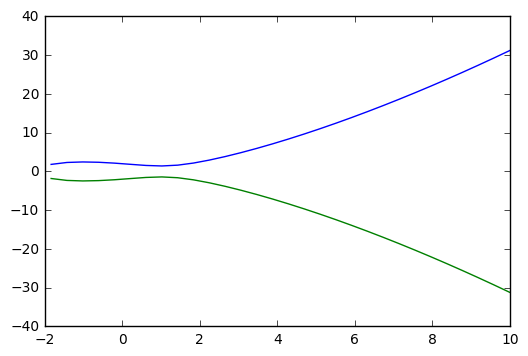

In [19]:
%matplotlib inline
import numpy as np
import pylab as pl

def f(x):
    return x**3 -3*x + 4

xa = np.mgrid[-10:10:50j] # box array
y = list()
x = list()
for i in range(0,len(xa)):
    _x = xa.ravel()[i] # 2d to 1d array
    _y=f(_x)
    if _y> 0:
        y.append(np.sqrt(_y))
        x.append(_x)
pl.plot(x, y, "-")
pl.plot(x, [-yi for yi in y], "-")
pl.show()

#### Elliptic curve 연산

Public key는 타원곡선 상의 곱셈 연산으로 구하게 된다.
* **더하기** 연산
    * Elliptic Curve에 2 점을 선택해 직선을 그으면 한 점과 반드시 교차하게 된다.
    * x축에 수직으로 내려서 곡선과 만나는 점을 구하면 덧셈이 된다. 즉 **R의 대칭점**이다.
* **곱하기** 연산
    * 자신의 접점에서 더하기 과정을 하면 곱셈이 된다.
    * P,Q가 동일한 경우, 즉 P+P=2P의 결과는 **접선 tangent line**을 그어서 만난 **R의 대칭점**이다.


![alt text](figures/4_ecdsa_add.png "ecdsa addition")

#### 더하기 연산으로 구하는 PubKey
시작점 'Generator' G에 정수k를 계속 더하면, 그 결과 P는 커브에 존재하는 점으로 계산된다.

```python
P=k*G
```

이 때 **k가 privKey**, **P가 pubKey**가 된다.
즉 pubKey는 privKey에서 생성되는 커브에 존재하는 **x,y 좌표 값**이다.
privKey는 256비트 **1 ~ $2^{256}$에 존재하는 하나의 값**이므로, 그 사이의 수만큼 계속 더해야 또는 곱셈이 Public key가 된다.
```python
pubKey = privKey * G
```

여기서 ```PubKey=G * privKey```는 계산이 매우 빠르고 쉽지만, 역으로 ```pubKey/G=privKey``` 즉 **pubKey에서 privKey를 계산해 내기는 거의 불가능하다**. G를 계속 privKey 횟수 만큼 빼주어야 찾을 수 있다. **privKey의 평균 값인 $2^{128}$** 340,282,366,920,938,463,463,374,607,431,768,211,456 횟수를 적어도 시도해야 한다.
아무리 성능이 좋은 컴퓨터라하더라도 그 횟수만큼 연산해서 privKey 암호를 해킹하는 것은 매우 어렵다는 의미이다.

```python
k=G/P
```

출처: Mastering Bitcoin p.70
![alt text](figures/4_ecdsa.png "ecdsa multiplication")

#### 유한체 Ellitic curve

**유한체 타원곡선 Elliptic curve over the finite field**는 modulus 연산을 하여 범위를 넘어서는 경우를 제한하게 된다.
**더하기 또는 곱하기를 하여도 그 결과는 항상 유한체에 존재**하게 된다. 따라서 x,y 좌표로 생성된 **pubKey는 그 크기가 일정 범위 $2^{512}$**에 있게 된다.
상수 a=-3, b=4, modulus=29인 타원곡선을 식으로 표현하면:

$E_{29}(-3,4)$

$y^2\ mod\ 29 =x^3-3x+4\ mod\ 29$

python으로 Elliptic Curve를 생성해보자.
그러기 위해서는 관련 라이브러리를 설치해야 한다.
```python
pip install pycoin
pip install python2-secrets #python2에서 사용하려면
```

In [20]:
import pycoin.ecdsa as ecdsa
import hashlib
import secrets

e=ecdsa.ellipticcurve.CurveFp(29,-3,4)
print(e.p(), e.a(),e.b())

(29, -3, 4)


특정 요소가 타원곡선에 존재하는지 확인할 수 있다.
시작점 (0,2)와 (22,1)은 곡선 상에 존재하지만, (22,3)은 그렇지 않다.

In [43]:
print("should be True (on curve) -> ", e.contains_point(0,2))
print("should be True (on curve) -> ", e.contains_point(22,1))
print("Should be False (not on curve) -> ", e.contains_point(22,3))

('should be True (on curve) -> ', True)
('should be True (on curve) -> ', True)
('Should be False (not on curve) -> ', False)


G (0,2)는 시작점이고 곱셈으로 유한체 상의 요소를 생성해 보자.

```python
1*G = (0, 2)
2*G = (6, 17)
3*G = (22, 1)
4*G = (23, 3)
5*G = (2, 8)
...
```

('The generator point', <pycoin.ecdsa.ellipticcurve.Point object at 0x7efd51b40090>)
(1, '(0,2)')
(2, '(6,17)')
(3, '(22,1)')
(4, '(23,3)')
(5, '(2,8)')
(6, '(7,6)')
(7, '(17,9)')
(8, '(21,3)')
(9, '(13,25)')
(10, '(3,15)')
(11, '(19,22)')
(12, '(14,26)')
(13, '(28,8)')
(14, '(8,17)')
(15, '(15,17)')
(16, '(15,12)')
(17, '(8,12)')
(18, '(28,21)')
(19, '(14,3)')
(20, '(19,7)')
(21, '(3,14)')
(22, '(13,4)')
(23, '(21,26)')
(24, '(17,20)')
(25, '(7,23)')
(26, '(2,21)')
(27, '(23,26)')
(28, '(22,28)')
(29, '(6,12)')
(30, '(0,27)')


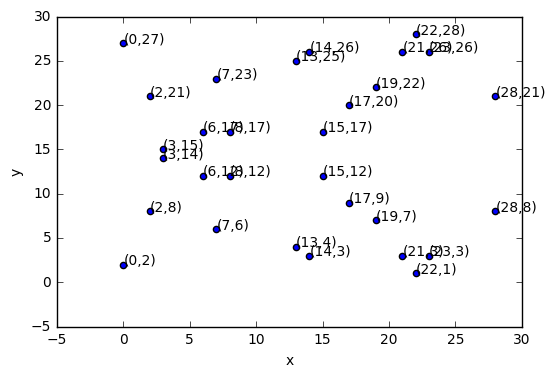

In [44]:
import numpy as np
import matplotlib.pyplot as plt

G=ecdsa.Point(e,0,2)
print("The generator point", G)
for k in range(1,31):
    print(k, str(k*G))
    P=k*G
    plt.scatter(P.x(),P.y())
    plt.text(P.x(),P.y(),str(P))

plt.xlabel('x')
plt.ylabel('y')
plt.show()

### secp256k1

비트코인, 이더리움 등 여러 암호화폐에서 사용하는 $y^2 = x^3 +7$이다.
a=0, b=7로 설정해 놓은 Elliptic curve이다.

SEC (Standards for Efficient Cryptography)에서는 secp256k1의 계산에 걸리는 **시간을 줄이기 위해 필요한 인자들을 미리 설정**해 놓았다.

T=(p,a,b,G,n,h)

prime p, elliptic curve 식의 a, b, 시작점 G, order of G(prime n, G를 자신에게 계속 더하면서 nG=O이 되는 n), cofactor h

```python
p = FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFE FFFFFC2F = 2256 - 232 - 29 - 28 - 27 - 26 - 24 - 1
a = 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000
b = 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000007
G = 02 79BE667E F9DCBBAC 55A06295 CE870B07 029BFCDB 2DCE28D9 59F2815B 16F81798
n = FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFE BAAEDCE6 AF48A03B BFD25E8C D0364141
h = 01
```

#### 개인키
ecdsa함수에서 생성된 무작위 수가 privKey가 된다.
64자리 32바이트이다.



Python secrets은 SystemRandom 클래스를 사용하여 무작위수를 생성하는 모듈
```randombelow()```는 괄호 이하의 무작위 수를 생성한다.

In [47]:
import sha3

privKey=secrets.randbelow(ecdsa.generator_secp256k1.order())
print("private key: ", privKey)
print("private key in hex: ", hex(privKey))

('private key: ', 6191621187307836618316971486088151167565809402516692256659013322546702423719L)
('private key: ', '0xdb05559e829cce6d4b96e8c2e8de5a3a97f0aa9764039c5cf0a1c7cfa1f96a7L')


#### 공중키

int.from_bytes는 바이트로부터 정수를 생성한다.

In [ ]:
#---signature
msg="hello ecdsa signature"
hashBytes = hashlib.sha3_256(msg.encode("utf8")).digest()
msgHash=int.from_bytes(hashBytes, byteorder="big")
signature=ecdsa.sign(ecdsa.generator_secp256k1,privKey,msgHash)
print("signature: ", signature)

#---verify
pubKey = (ecdsa.generator_secp256k1 * privKey).pair()
print("pubKey: ", pubKey)
valid=ecdsa.verify(ecdsa.generator_secp256k1,pubKey,msgHash,signature)
print("valid: ", valid)

## 문제 4-3: 계정 충전하기
<a id='4-3'></a>

송금을 하거나 블록체인에 데이터를 저장하거나 거래에는 비용이 발생한다.
그러려면 계정에 잔고가 있어야 한다.
계정에 잔고가 있으려면 Ether를 구매하거나, 마이닝을 해서 충전을 해야 한다.

명령창에서 충전하려면, mine과 port를 설정해서 실행할 수 있다.
datadir는 현재 geth가 실행되고 있는 디렉토리이다.
```python
$ geth --datadir "~/Downloads/eth/1/"
--mine --minerthreads=4 --port 30445
```

또는 geth console에서 충전할 수 있다.
```
> miner.start(1);admin.sleepBlocks(1);miner.stop() 1건만 마이닝할 경우
```


In [69]:
!geth --exec "miner.start(1);admin.sleepBlocks(1);miner.stop()" attach http://117.16.44.45:8445

null


* 계정을 선택하고 현재 blockNumber와 잔고가 증가했는지 살펴보자.
* private이라서 자신이 거래를 발생하여 마이닝 한다.
* eth와 web3를 섞어서 사용하는 것은 피하도록 한다.

![alt text](figures/2_sendTransactionToAnotherAccount.png "send transaction to another account")

![alt text](figures/2_transactionReceipt.png "transaction recepit after send transaction")

### 4.2.6 Wallet

Wallet은 우리가 일상생활에서 사용하는 현금, 신용카드 등을 가지고 있는 지갑과 비슷하다.
Wallet은 **계정, private key**를 가지고 있는 파일 또는 데이터베이스를 말한다.
단순히 계정만을 가지고 있지 않고 **블록체인과 인터페이스**하는 기능도 제공하기도 한다.
잔고를 조회하거나 스마트계약을 블록체인에 배포하는 등의 기능도 제공한다.

지갑은 주소를 생성하는 기능도 있는데, 매번 완전히 새롭게 생성하지 않고 **HD Hierarchical Deterministic** 방식으로 하나의 마스터 시드 Seed 키에서 다수의 주소를 생성할 수 있다. 이런 암호화페 지갑을 계층적 결정 지갑이라고 한다. 

Wallet은 여러 종류가 있다.
존재하는 형태에 따라 PC Wallets, 모바일 Wallets, 하드웨어 wallets, USB wallets, 종이형태의 wallets이 있다. QR코드 형식으로 만들어진 Wallet도 있다.
소프트웨어 형식으로 존재하는 MetaMask, Mist, MyCrypto (https://mycrypto.com) 등을 사용할 수도 있다.

geth는 cli방식의 wallet. 계정을 만들고, 입출금, 전송을 할 수 있다. 계약을 만들 수도 있다.
wallet은 네트워크에 저장되어 있지 않고, 사용자 컴퓨터 <DATADIR>/keystore에 있다. 형식은 UTC--{year}-{month}--{account}.
* public key - 누구나 사용할 수 있는 키. 통장번호와 같다.
* private key - 당사자만 가지고 있는 키. 통장의 비밀번호 PIN 또는 수표의 서명과 같다.

In [52]:
!geth --exec 'personal.listWallets' attach http://117.16.44.45:8445

[{
    accounts: [{
        address: "0x21c704354d07f804bab01894e8b4eb4e0eba7451",
        url: "keystore:///home/jsl/eth/keystore/UTC--2019-01-03T21-57-03.966937024Z--21c704354d07f804bab01894e8b4eb4e0eba7451"
    }],
    status: "Unlocked",
    url: "keystore:///home/jsl/eth/keystore/UTC--2019-01-03T21-57-03.966937024Z--21c704354d07f804bab01894e8b4eb4e0eba7451"
}, {
    accounts: [{
        address: "0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480",
        url: "keystore:///home/jsl/eth/keystore/UTC--2019-01-04T01-40-01.674920065Z--778ea91cb0d0879c22ca20c5aea6fbf8cbeed480"
    }],
    status: "Locked",
    url: "keystore:///home/jsl/eth/keystore/UTC--2019-01-04T01-40-01.674920065Z--778ea91cb0d0879c22ca20c5aea6fbf8cbeed480"
}]


계정간에 송금하는 거래이다. gas가 모자라면 거래가 지연될 수 있다.

In [1]:
%%writefile src/e_test0.js
var primary = web3.eth.accounts[0];
var bal=web3.eth.getBalance(primary);
console.log('primary: ', primary);
console.log('coinbase: ', eth.coinbase);
console.log('balance: ', bal);
console.log('wei balance: ', web3.fromWei(eth.getBalance(eth.accounts[0]),"ether"));
console.log('gas price: ', eth.gasPrice);
console.log('block number: ', eth.blockNumber);
eth.sendTransaction({from:eth.accounts[0], to:eth.accounts[1],value:10000});
console.log('...mining start');
miner.start(1);admin.sleepBlocks(1);miner.stop();
console.log('mining done...');
console.log('block number: ', eth.blockNumber);
console.log('wei balance: ', web3.fromWei(eth.getBalance(eth.accounts[0]),"ether"));

Overwriting src/e_test0.js


In [3]:
!geth --exec 'loadScript("src/e_test0.js")' attach http://117.16.44.45:8445

primary:  0x21c704354d07f804bab01894e8b4eb4e0eba7451
coinbase:  0x21c704354d07f804bab01894e8b4eb4e0eba7451
balance:  660000000000000000000
wei balance:  660
gas price:  1000000000
block number:  132
...mining start
mining done...
block number:  135
wei balance:  674.99999999999999
true
